In [1]:
import numpy as np


class Perceptron:
    """
    Perceptron neuron
    """

    def __init__(self, learning_rate=0.1):
        """
        instantiate a new Perceptron

        :param learning_rate: coefficient used to tune the model
        response to training data
        """
        self.learning_rate = learning_rate
        self._b = 0.0  # y-intercept
        self._w = None  # weights assigned to input features
        # count of errors during each iteration
        self.misclassified_samples = []

    def fit(self, x: np.array, y: np.array, n_iter=10):
        """
        fit the Perceptron model on the training data

        :param x: samples to fit the model on
        :param y: labels of the training samples
        :param n_iter: number of training iterations 
        """
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []

        for _ in range(n_iter):
            # counter of the errors during this training iteration
            errors = 0
            for xi, yi in zip(x, y):
                # for each sample compute the update value
                update = self.learning_rate * (yi - self.predict(xi))
                # and apply it to the y-intercept and weights array
                self._b += update
                self._w += update * xi
                errors += int(update != 0.0)

            self.misclassified_samples.append(errors)

    def f(self, x: np.array) -> float:
        """
        compute the output of the neuron
        :param x: input features
        :return: the output of the neuron
        """
        return np.dot(x, self._w) + self._b

    def predict(self, x: np.array):
        """
        convert the output of the neuron to a binary output
        :param x: input features
        :return: 1 if the output for the sample is positive (or zero),
        -1 otherwise
        """
        return np.where(self.f(x) >= 0, 1, -1)

In [2]:
import pandas as pd


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# download and convert the csv into a DataFrame
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


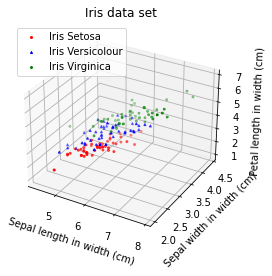

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

y = df.iloc[:, 4].values
x = df.iloc[:, 0:3].values

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_title('Iris data set')
ax.set_xlabel("Sepal length in width (cm)")
ax.set_ylabel("Sepal width in width (cm)")
ax.set_zlabel("Petal length in width (cm)")

ax.scatter(x[:50, 0], x[:50, 1], x[:50, 2], color='red', 
           marker='o', s=4, edgecolor='red', label="Iris Setosa")
ax.scatter(x[50:100, 0], x[50:100, 1], x[50:100, 2], color='blue', 
           marker='^', s=4, edgecolor='blue', label="Iris Versicolour")
ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green', 
           marker='x', s=4, edgecolor='green', label="Iris Virginica")

plt.legend(loc='upper left')
plt.show()


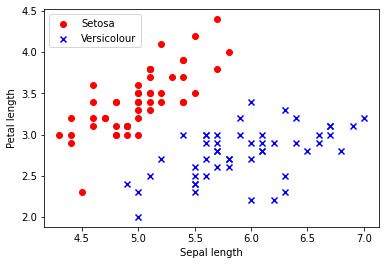

In [4]:
x = x[0:100]
y = y[0:100]

# plot Iris Setosa samples
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Setosa')
# plot Iris Versicolour samples
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='Versicolour')

# show the legend
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc='upper left')

# show the plot
plt.show()

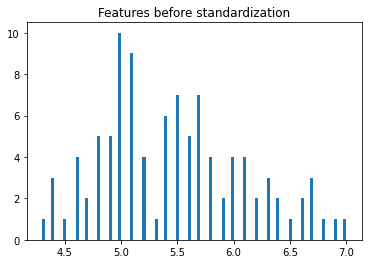

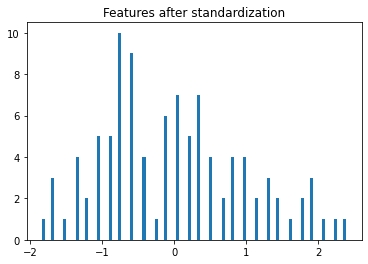

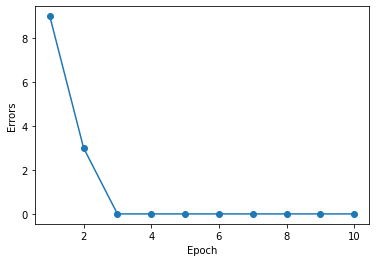

In [6]:
from sklearn.model_selection import train_test_split

# map the labels to a binary integer value
y = np.where(y == 'Iris-setosa', 1, -1)

# standardization of the input features
plt.hist(x[:, 0], bins=100)
plt.title("Features before standardization")
plt.savefig("./before.png", dpi=300)
plt.show()

x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

plt.hist(x[:, 0], bins=100)
plt.title("Features after standardization")
plt.show()

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=0)

# train the model
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_train, y_train)

# plot the number of errors during each iteration
plt.plot(range(1, len(classifier.misclassified_samples) + 1),
         classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()

In [10]:
from sklearn.metrics import accuracy_score
print("accuracy %f" % accuracy_score(classifier.predict(x_test), y_test))

accuracy 0.000000
